## About dataset

 We have received employee attrition data of a company comprising of 1470 employees.

 - Employee attrition dataset comprise of details (21 attributes) that describe employee details such as Department, Education, Age etc.
 
 
 - Other attribute is "Attrition" which is our target variable
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

## Business Problem

Basis attributes given in the dataset we need to identify factors behind attrition rate of the company.

Also, provide suggestion to improve the attrition rate

#### Reading data

In [2]:
attrition = pd.read_csv("https://raw.githubusercontent.com/HimKant/Datasets/main/attrition.csv")

In [4]:
attrition.shape

(1470, 20)

In [5]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [6]:
attrition.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [7]:
attrition.dtypes ## To know the data type of the variables in the dataset

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
OverTime                   object
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
DistanceFromHome            int64
dtype: object

In [8]:
attrition.isnull().sum() ## To check null values in the dataset

# There is no null value in the dataset

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
DistanceFromHome           0
dtype: int64

## Exploratory Data Analysis

## I. Univariate Analysis

### 1. Age

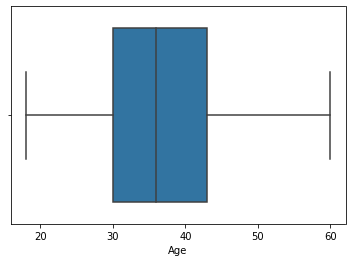

In [9]:
sns.boxplot(attrition['Age'])

Text(0.5, 0, 'Age')

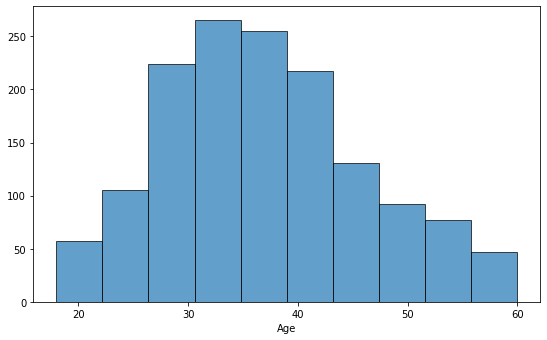

In [10]:
plt.figure(figsize= (20,25))
plt.subplot(4,2,1)
plt.hist(attrition.Age, edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

In [11]:
attrition.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

#### Observation

- Age variable represents age of the employees ranging from 18-60 years

- Avg age of the employees and median age of the employees is approx 36.92 years and 36 years respectively

- 50% of employees is aged between 18 to 36 years

- Only 25% of employees is aged > 43 years

- No presence of outliers

### 2. Attrition

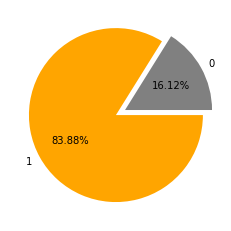

In [12]:
attr_rate=pd.crosstab(attrition.Attrition,columns="Count")
attr_rate
label_attr_rate=["0","1"]
value_attr_rate=[237,1233]

plt.pie(value_attr_rate,labels=label_attr_rate,autopct="%0.2F%%",colors=["Grey","Orange"],explode=[0.12,0])
plt.show()

#### Observation

- Attrition variable consists of two values "0" and "1" where "1" refers to attrition i.e employess who left the organisation and "0" refers to employees stayed in organisation

- It is a categorical variable; Scale of measurement is Nominal in nature

- Attrition rate i.e % of employees who left the organisation is 16.12% 

### 3. Business Travel

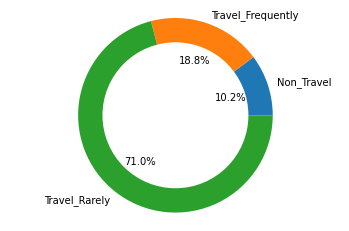

In [13]:
#donut
Non_Travel=150/1470*100
Travel_Frequently=277/1470*100
Travel_Rarely=1043/1470*100


labels = ["Non_Travel","Travel_Frequently","Travel_Rarely"]
sizes = [Non_Travel,Travel_Frequently,Travel_Rarely]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

#### Observation

- Variable "Business Travel" comprises categories - Non Travel/Travel frequenty/Travel Rarely 
- It is a categorical variable; Scale of measurement is Ordinal in nature 
- 89.8% of total employess travels for business purpose out of which 20.98% travels frequently

### 4. Department

Text(0.5, 0, 'No of employees')

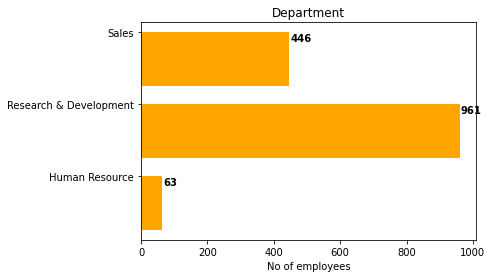

In [14]:
x = ['Human Resource','Research & Development', 'Sales']
y = [63,961,446]

fig, ax = plt.subplots()    
width = 0.75 

for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), fontweight='bold')
    
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="Orange")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Department')
plt.xlabel('No of employees')
#plt.ylabel('')      
###plt.show()

In [15]:
n=len(attrition)
tab = pd.crosstab(attrition.Department, columns="Percentage")
round((tab/n*100),2)

col_0,Percentage
Department,
Human Resources,4.29
Research & Development,65.37
Sales,30.34


#### Observation

- Variable "Department" is consists of Human resources, Resources & Development, Sales

- It is categorical variable; Scale of measurement is Nominal in nature

- 65.37% employees is part of R & D department followed by Sales dept with 30.34% 

- Basis data it can be inferred that organization is a Research & development based organisation

- Very less no. of employess seen in Human resources with 4.29%

### 5. Education Field

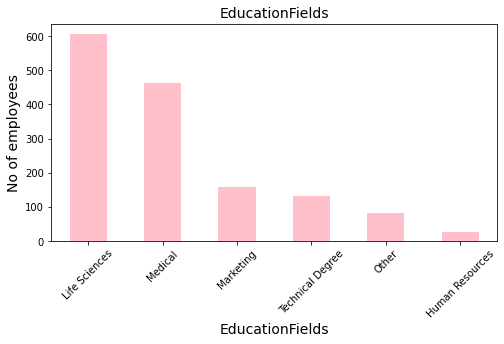

In [16]:
attrition.EducationField.value_counts().plot(kind='bar', figsize=(8,4), color='pink', rot=45)
plt.title('EducationFields', fontsize=14)
plt.xlabel('EducationFields', fontsize=14)
plt.ylabel('No of employees', fontsize=14)
plt.grid(False)
plt.show()

In [17]:
attrition.head() 

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [18]:
n=len(attrition)

In [19]:
tab1 = pd.crosstab(attrition.EducationField, columns="Percentage")
round((tab1/n*100),2)

col_0,Percentage
EducationField,
Human Resources,1.84
Life Sciences,41.22
Marketing,10.82
Medical,31.56
Other,5.58
Technical Degree,8.98


#### Observation

- Variable "Education" comprises of values - Human Resources,Life sciences,Marketing,Medical,Other,Technical degree
- It is categorical variable; Scale of measurement is Nominal in nature
- Majority employees comes from an education background of Life sciences 41.22% followed by Medical with 31.56% & Marketing 10.82%
- Based on Department variable, it indicates that organisation is involved in a field related to Science research and development, the data confirms that a vast majority of employees, i.e.approx 72%, have an educational background in life sciences and medicine. 
The remaining employees come with technical, marketing, HR or other degrees

- Only 1.84% of total employeees come with a degree in Human resources

### 6. Environmental Satisfaction

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fcc4959ec10>],
 'cbars': <matplotlib.collections.LineCollection at 0x7fcc495ab550>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fcc4959ea50>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7fcc495ab8d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fcc495ab210>}

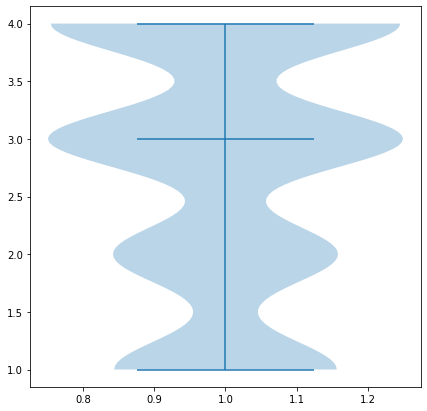

In [20]:
plt.figure(figsize=(7,7))
plt.violinplot(attrition.EnvironmentSatisfaction, showmedians=True)

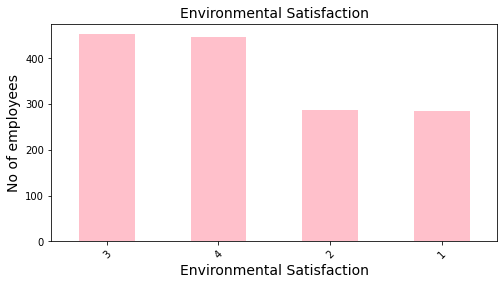

In [21]:
attrition.EnvironmentSatisfaction.value_counts().plot(kind='bar', figsize=(8,4), color='pink', rot=45)
plt.title('Environmental Satisfaction', fontsize=14)
plt.xlabel('Environmental Satisfaction', fontsize=14)
plt.ylabel('No of employees', fontsize=14)
plt.grid(False)
plt.show()

In [22]:
tab2 = pd.crosstab(attrition.EnvironmentSatisfaction, columns="Percentage")
round((tab2/n*100),2)

col_0,Percentage
EnvironmentSatisfaction,
1,19.32
2,19.52
3,30.82
4,30.34


#### Observation

- Variable "Environment Satisfaction" consists of values ranging from 1 to 4; 
- 1 representing low environmental satisfaction level & 4 representing high environmental satisfaction
- It is a categorical variable; Scale of measurement is Ordinal in nature
- 61.16% employees experience a higher level of environment satisfaction whereas 38% employees feel discontented with the organization's environment which is high

### 7. Gender

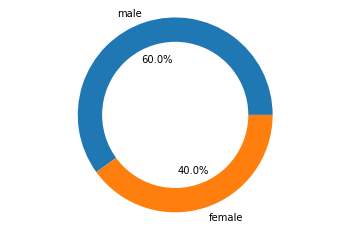

In [23]:
male = 882/1470*100
female = 588/1470*100

labels = ['male','female']
sizes = [male, female]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

In [24]:
tab3 = pd.crosstab(attrition.Gender, columns="Percentage")
tab3

col_0,Percentage
Gender,
Female,588
Male,882


- Variable "Gender" consists of value "Male & "Female"
- It is categorical variable; Scale of measurement is nominal in nature
- Ratio of male to female employees is 60:40 

### 8. Job Involvement

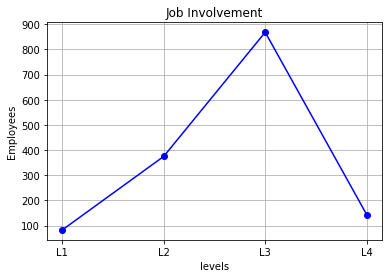

In [25]:
labels = 'L1', 'L2','L3','L4'
sizes = [83,375,868,144]
  
plt.plot(labels, sizes,color='Blue', marker='o')
plt.title('Job Involvement')
plt.xlabel('levels')
plt.ylabel('Employees')
plt.grid(True)
plt.show()

In [26]:
tab4= pd.crosstab(attrition.JobInvolvement, columns='count')
tab4


col_0,count
JobInvolvement,
1,83
2,375
3,868
4,144


In [27]:
tab4 = pd.crosstab(attrition.JobInvolvement, columns="Percentage")
round((tab4/n*100),2)

col_0,Percentage
JobInvolvement,
1,5.65
2,25.51
3,59.05
4,9.80


#### Observation

- It is categorical variable; Scale of measurement is Ordinal in nature
- Variable "Job involvement" consists of values ranging from 1 to 4; 
- 1 representing low job involvement level & 4 representing high job involvement
- It is assumed that this rating is assigned by Supervisor 
- It is  observed that substantial no. of employees (68.84%) is rated with 3&4 indicating greater job involvement 

### 9. Job level

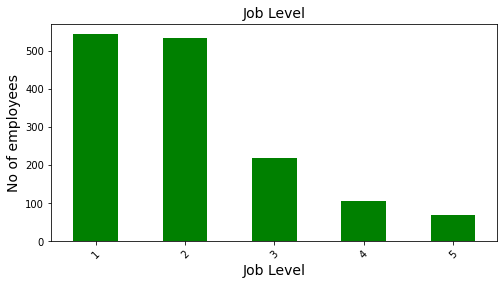

In [28]:
attrition.JobLevel.value_counts().plot(kind='bar', figsize=(8,4), color='green', rot=45)
plt.title('Job Level', fontsize=14)
plt.xlabel('Job Level', fontsize=14)
plt.ylabel('No of employees', fontsize=14)
plt.grid(False)
plt.show()

In [29]:
tab5= pd.crosstab(attrition.JobLevel, columns="count")
round((tab5/n*100),2)

col_0,count
JobLevel,
1,36.94
2,36.33
3,14.83
4,7.21
5,4.69


In [30]:
round((tab5/n*100),2)

col_0,count
JobLevel,
1,36.94
2,36.33
3,14.83
4,7.21
5,4.69


#### Observation

- It is a categorical variable whose scale of measurement is ordinal in nature
- Variable "Job level" consists of values ranging from 1 to 5; 1 being the lowest designation and 5 being the most senior designation
- Approx 73% of the employees are at lower levels of organizational hierarchy, i.e. levels 1 and 2
- This is in accordance with typical management hierarchy structure where there are few employees in Top management level(4.69%) 

### 10. Job Satisfaction

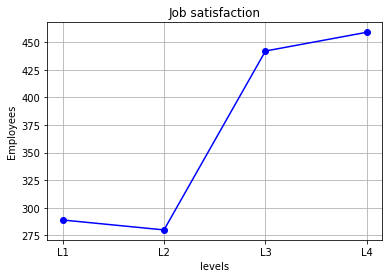

In [31]:
levels = 'L1', 'L2','L3','L4'
sizes = [289,280,442,459]
  
plt.plot(levels, sizes,color='Blue', marker='o')
plt.title('Job satisfaction')
plt.xlabel('levels')
plt.ylabel('Employees')
plt.grid(True)
plt.show()

In [32]:
tab6=pd.crosstab(attrition.JobSatisfaction, columns="counts")
tab6

col_0,counts
JobSatisfaction,
1,289
2,280
3,442
4,459


In [ ]:
round((tab6/n*100),2)

col_0,counts
JobSatisfaction,
1,19.66
2,19.05
3,30.07
4,31.22


#### Observation

- It is a  categorical variable; Scale of measurement is Ordinal in nature
- Variable "Job satisfaction" consists of values ranging from 1 to 4;
- 1 representing low job satisfaction level & 4 representing high job satisfaction level
- 61.29% of the employees experience higher levels of job satisfaction (i.e. they have given ranks of 3 & 4)
- 61% of employees has both Job as well as Environmental satisfaction

### 11. Marital status

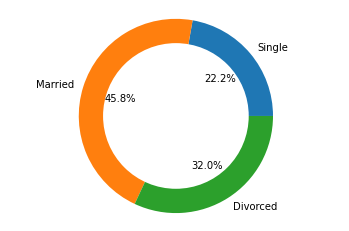

In [ ]:
Single = 327/1470*100
Married = 673/1470*100
Divorced = 470/1470*100

labels = ['Single', 'Married','Divorced']
sizes = [Single, Married,Divorced]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

In [33]:
tab7=pd.crosstab(attrition.MaritalStatus,columns="Counts")
tab7

col_0,Counts
MaritalStatus,
Divorced,327
Married,673
Single,470


In [34]:
round((tab7/n*100),2)

col_0,Counts
MaritalStatus,
Divorced,22.24
Married,45.78
Single,31.97


#### Observation
- It is a categorical variable; Scale of measurement is Nominal in nature 
- Variable "Marital status" comprises of values - Married/Single/Divorced
- Majority of employees, i.e., 45.78% are married followed with single population of 31.97%; 
- There is a sizeable divorced population, i.e., 22.24%, which could be related with age, higher job involvement and overtime 

### 12. Overtime

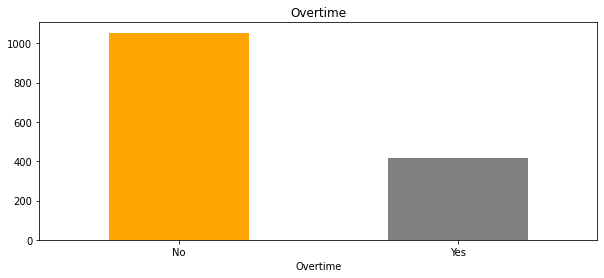

In [35]:
attrition.OverTime.value_counts().plot(kind='bar', figsize=(10,4),rot=0, color = ['Orange', 'Grey'] )
plt.xlabel('Overtime')
plt.title('Overtime')
plt.show()

In [36]:
tab8=pd.crosstab(attrition.OverTime,columns="count")
tab8, round((tab8/n*100),2)

(col_0     count
 OverTime       
 No         1054
 Yes         416, col_0     count
 OverTime       
 No         71.7
 Yes        28.3)

#### Observation

- It is categorical variable, Scale of measurement is Nominal in nature 
- Variable "Overtime" comprises of binary values - Yes/No
- 28.3% of employees is doing overtime beyond their stipulatemd work hours

### 13. Work Life Balance

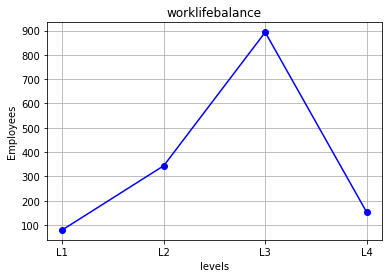

In [37]:
levels = 'L1', 'L2','L3','L4'
sizes = [80, 344, 893, 153]
plt.plot(levels, sizes,color='Blue', marker='o')
plt.title('worklifebalance')
plt.xlabel('levels')
plt.ylabel('Employees')
plt.grid(True)
plt.show()

In [38]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [39]:
tab9=pd.crosstab(attrition.WorkLifeBalance,columns="counts")
tab9, round((tab9/n*100),2)

(col_0            counts
 WorkLifeBalance        
 1                    80
 2                   344
 3                   893
 4                   153, col_0            counts
 WorkLifeBalance        
 1                  5.44
 2                 23.40
 3                 60.75
 4                 10.41)

#### Observation

- It is categorical variable; Scale of measurement is Ordinal in nature 
- Variable "Work life balance" comprises of 4 levels - 1 being the lowest, 4 being the highest 
- 71% of the employees claim to have a high work life balance

### 14. Monthly Income

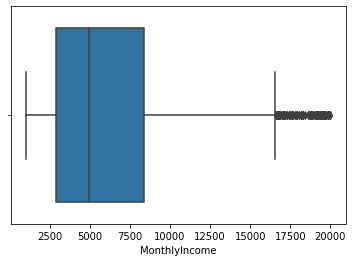

In [40]:
sns.boxplot(attrition["MonthlyIncome"])

In [41]:
attrition.MonthlyIncome.describe(), np.quantile(attrition.MonthlyIncome,0.95)

(count     1470.000000
 mean      6502.931293
 std       4707.956783
 min       1009.000000
 25%       2911.000000
 50%       4919.000000
 75%       8379.000000
 max      19999.000000
 Name: MonthlyIncome, dtype: float64, 17821.349999999995)

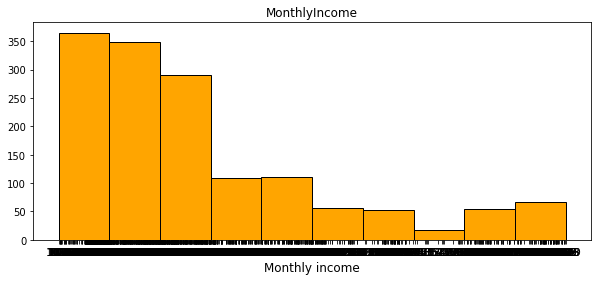

In [42]:
attrition.hist(column="MonthlyIncome", grid=False , figsize=(10,4), color="Orange" , edgecolor="black")

plt.xlabel("Monthly income" , fontsize=12)
plt.xticks(attrition.MonthlyIncome)

plt.show()


In [43]:
def find_outliers_IQR(attrition):
    q1=attrition.quantile(0.25)
    q3=attrition.quantile(0.75)
    IQR=q3-q1
    outliers = attrition[((attrition<(q1-1.5*IQR)) | (attrition>(q3+1.5*IQR)))]
    return outliers

In [44]:
outliers = find_outliers_IQR(attrition["MonthlyIncome"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

print("Total outlier (%):" + str(len(outliers)/len(attrition)*100))

number of outliers: 114
max outlier value: 19999
min outlier value: 16595
Total outlier (%):7.755102040816326



#### Observation

- Average monthly income of an employee in this organisation is approx 6503
- Large standard deviation observed, which implies that values are distributed across a larger range. 
- Mean is larger than the  median therefore indicating a skewed distribution towards the right
- 50% of employees earns less than 4919 which is even less than the avg salary of 6503 whereas only 5% of the employees earns between 17.8K to 20K

### 15. Total working years & Years at Company

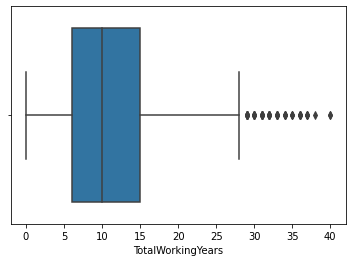

In [45]:
sns.boxplot(attrition["TotalWorkingYears"])

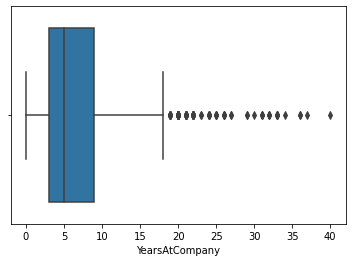

In [46]:
sns.boxplot(attrition["YearsAtCompany"])

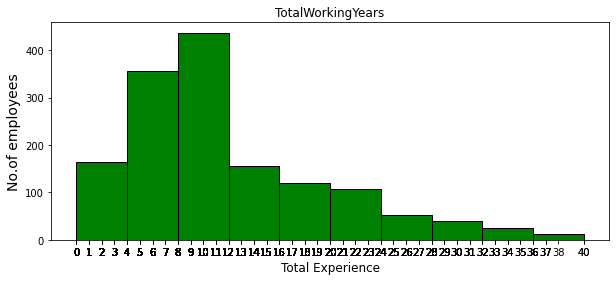

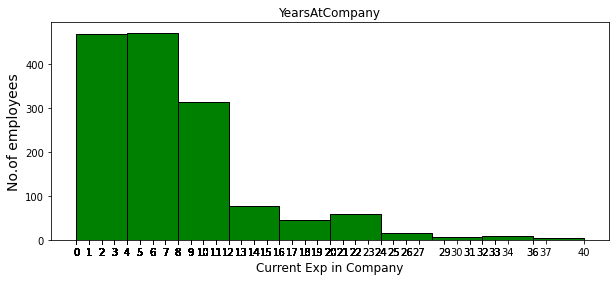

In [47]:
attrition.hist(column="TotalWorkingYears", grid=False , figsize=(10,4), color="Green" , edgecolor="black")

plt.xlabel("Total Experience" , fontsize=12)
plt.ylabel("No.of employees" , fontsize=14)
plt.xticks(attrition.TotalWorkingYears)

plt.show()


attrition.hist(column="YearsAtCompany", grid=False , figsize=(10,4), color="Green" , edgecolor="black")

plt.xlabel("Current Exp in Company" , fontsize=12)
plt.ylabel("No.of employees" , fontsize=14)
plt.xticks(attrition.YearsAtCompany)

plt.show()

In [48]:
outliers = find_outliers_IQR(attrition["TotalWorkingYears"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

print("Total outlier (%):" + str(len(outliers)/len(attrition)*100))

number of outliers: 63
max outlier value: 40
min outlier value: 29
Total outlier (%):4.285714285714286


In [49]:
outliers = find_outliers_IQR(attrition["YearsAtCompany"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

print("Total outlier (%):" + str(len(outliers)/len(attrition)*100))

number of outliers: 104
max outlier value: 40
min outlier value: 19
Total outlier (%):7.07482993197279


In [50]:
attrition.TotalWorkingYears.describe() , attrition.YearsAtCompany.describe()

(count    1470.000000
 mean       11.279592
 std         7.780782
 min         0.000000
 25%         6.000000
 50%        10.000000
 75%        15.000000
 max        40.000000
 Name: TotalWorkingYears, dtype: float64, count    1470.000000
 mean        7.008163
 std         6.126525
 min         0.000000
 25%         3.000000
 50%         5.000000
 75%         9.000000
 max        40.000000
 Name: YearsAtCompany, dtype: float64)

#### Observation - Total Working Years
- Variable "total working years" refers to employees total work experience till date comprising of current as well as previous experience 
- It is a numerical variable and scale of measurement is continuous in nature
- Avg total experience of an employee is approx 11years
- 50% of the employees have a total work ex of less than 10 years 
- Mean is higher than median which implies distribution of total working years is skewed towards right 
- Only 25% of the employees have worked for more than 15 years
- Only 5% of the employees have work ex of less than 1 year which means the proportion of hiring freshers is less int he company and they prefer hiring resources with high mid or high experience
- Presence of outlier of 4 % observed in the said variable and max outlier is 40 years

#### Observation -  Years at company

- Variable "Years at company" refers to employees' no.of years of experience with the current organisation
- It is a numerical variable and scale of measurement is continuous in nature
- Avg experience of employees with the current organisation is 7 years 
- 50% of employees have total experience less than 5 years
- Only 25% employees have total experience more than 9 years 
- This organisation seems to be min 40 years old considering there is one osbervation stating current experience with the company is 40 years which could be that this particualr employee was part of the organisation since inception
- Presence of outlier of 7% observed with max outlier value of 40 years

### 16. Years in current role

In [51]:
attrition.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

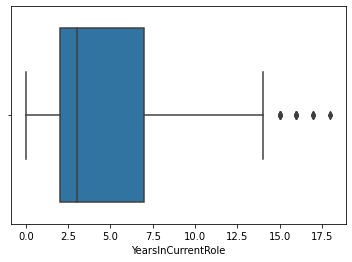

In [52]:
sns.boxplot(attrition["YearsInCurrentRole"])

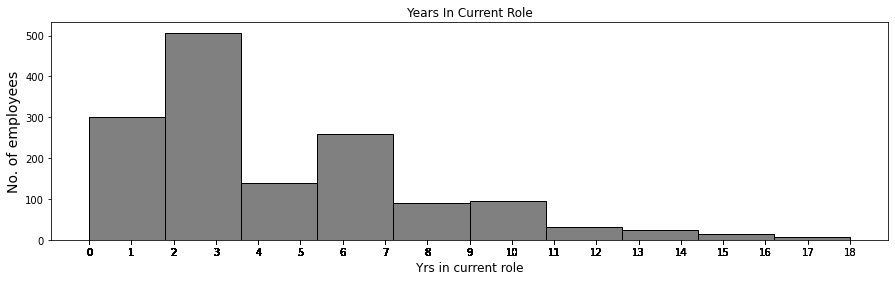

In [53]:
attrition.hist(column="YearsInCurrentRole", grid = False, figsize=(15,4), color="grey", edgecolor="black")
plt.xlabel("YearsInCurrentRole")

plt.xticks(attrition.YearsInCurrentRole)
plt.title("Years In Current Role", fontsize=12)

plt.xlabel("Yrs in current role", fontsize=12)
plt.ylabel("No. of employees" , fontsize=14)

plt.show()

## Observation

- Variable "Years in current role" refers to no. of years an employee has worked in his current role /designation
- Avg years of employees working in their current role is 4.2 years which gives an indication that employees are not motivated with elevation in the their position or given new challenging roles 
- 50% of the employees have less than 3 years of experience in their current role/designation
- It is observed that data is positively skewed towards lower no. of years in current role
- 25% of employees is assocaiated with their current role in the company for >7 years which again could be contributing to attrition rate since employees are associated with their current roles for longer years with no learning curve 

### 17. Years in last promotion

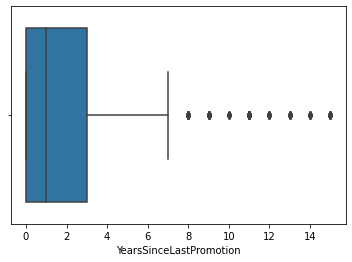

In [54]:
sns.boxplot(attrition["YearsSinceLastPromotion"])

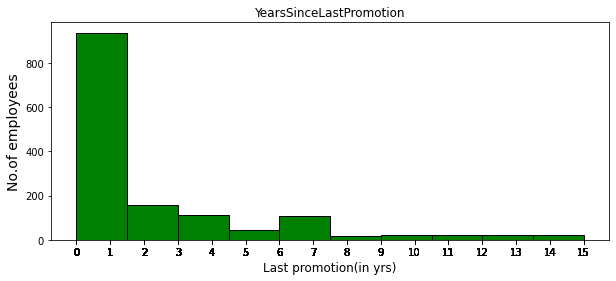

In [55]:
attrition.hist(column="YearsSinceLastPromotion", grid=False , figsize=(10,4), color="Green" , edgecolor="black")

plt.xlabel("Last promotion(in yrs)" , fontsize=12)
plt.ylabel("No.of employees" , fontsize=14)
plt.xticks(attrition.YearsSinceLastPromotion)


plt.show()

In [56]:
attrition.YearsSinceLastPromotion.describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

#### Observation 

- Variable "YearsSinceLastPromotion" refers to no. of years of employees who got their last promotion
- Avg years of employees getting promotion is 2.18 years
- 50% of employees got their last promotion in less than 1 year; 
- 75% of employees got their last promotion in less than 3 years; 
- This shows that company used to motivate and acknowledge employees for their work and promote them however it does not corroborate with
the fact inferred from variable "YearsInCurrentRole" as avg years of employees working in their current role is 4.2 years 

### 18. Years With Curr Manager

In [57]:
attrition.YearsWithCurrManager.describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

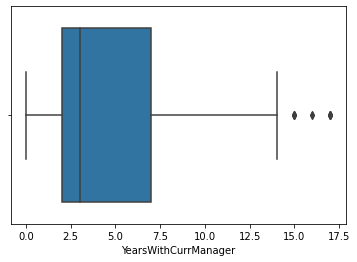

In [58]:
sns.boxplot(attrition["YearsWithCurrManager"])

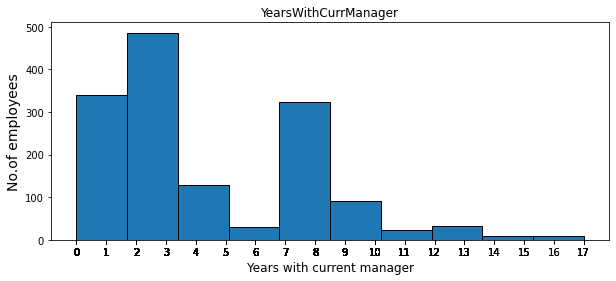

In [59]:
attrition.hist(column="YearsWithCurrManager", grid=False , figsize=(10,4) , edgecolor="black")    
plt.xlabel("Years with current manager" , fontsize=12)
plt.ylabel("No.of employees" , fontsize=14)
plt.xticks(attrition.YearsWithCurrManager)

plt.show()

#### Observation

- Variable "YearsWithCurrManager" refer to no. of years an employee has worked with his current manager/supervisor
- It is a numerical variable and scale of measurement is continuous in nature
- majority of employees have worked with current manager at least 2 years
- Atleast 25% of employees in the organisation have worked with current manager for more than 11 years    

In [60]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


### 19. Distance from home

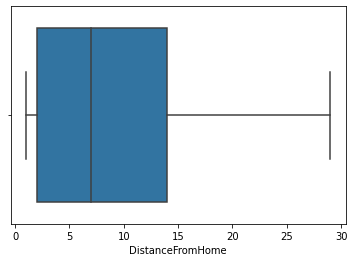

In [61]:
sns.boxplot(attrition["DistanceFromHome"])

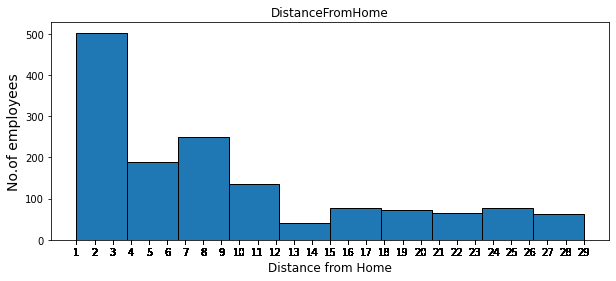

In [62]:
attrition.hist(column="DistanceFromHome", grid=False , figsize=(10,4) , edgecolor="black")    
plt.xlabel("Distance from Home" , fontsize=12)
plt.ylabel("No.of employees" , fontsize=14)
plt.xticks(attrition.DistanceFromHome)

plt.show()

In [63]:
attrition.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [64]:
attrition.tail()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2
1469,34,0,Travel_Rarely,Research & Development,Medical,2,Male,4,2,3,Married,4404,No,6,4,4,3,1,2,8


#### Observation

- Max distance travelled by an employee for office is 29kms and minimum is 1km
- Avg distance from 10km from the company
- 25% employees live upto 14 km farther from the company

Note: Dropping Distance from office variable as it looks same as Distance from Home only difference observed is 0.5 increase in distance

In [65]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


## Bi-variate analysis

## I. Categorical Variables with respect to Attrition

In [66]:
data=attrition[['Attrition','BusinessTravel','Department','EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime','WorkLifeBalance']]

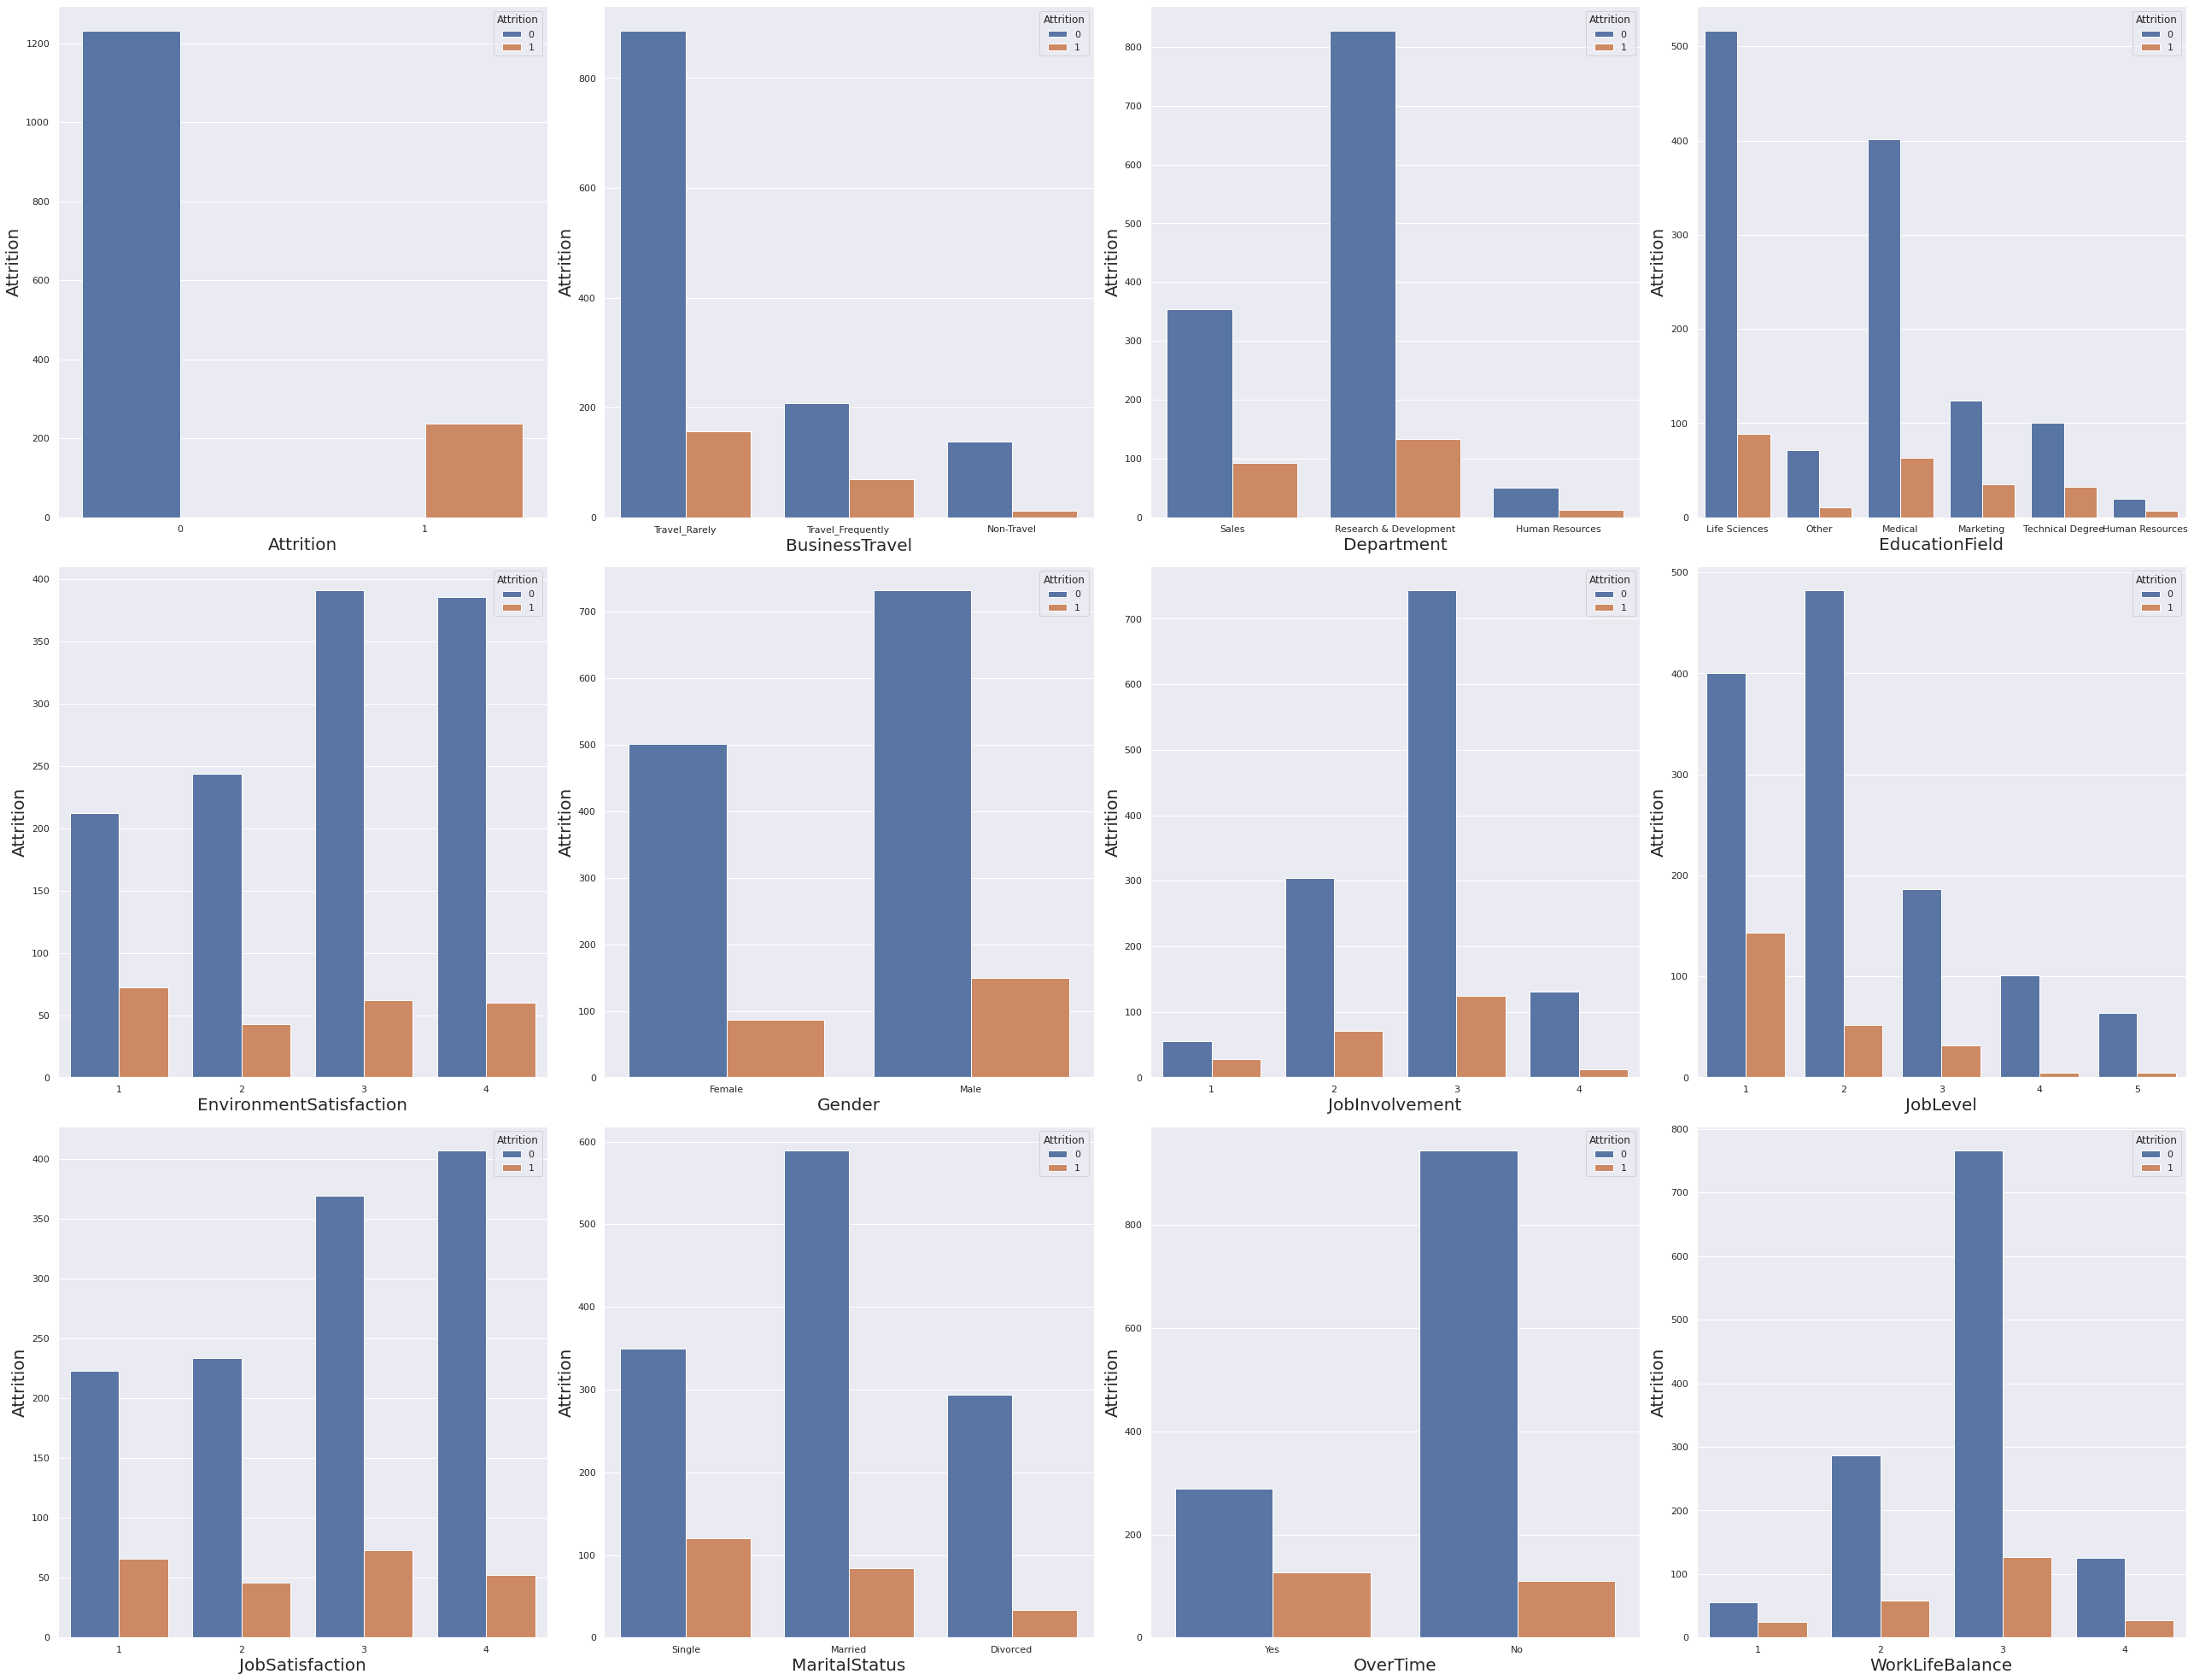

In [67]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(36,36), facecolor='white')
plotnumber = 1
sns.set()
for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0)
                        ,hue=data.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights from Bi-Variate Analysis - Categorical variables with respect to Attrition(Target variable)

### Ques 1 - Business Travel : Whether frequent business travel is causing high attrition rate 

### Rationale: It could be that if employees are frequently traveling they may be spending less time at home

In [68]:
BT =pd.crosstab(attrition.BusinessTravel, columns=attrition.Attrition)
BT

Attrition,0,1
BusinessTravel,,
Non-Travel,138,12
Travel_Frequently,208,69
Travel_Rarely,887,156


In [69]:
BT_coltotal=BT.sum(axis=1)
BT_coltotal

BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
dtype: int64

In [70]:
# Column Total'
BT.div(BT_coltotal,axis=0)*100

Attrition,0,1
BusinessTravel,,
Non-Travel,92.000000,8.000000
Travel_Frequently,75.090253,24.909747
Travel_Rarely,85.043145,14.956855


In [71]:
BT1 =pd.crosstab(attrition.Attrition, columns=attrition.BusinessTravel)
BT1

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,138,208,887
1,12,69,156


In [72]:
# Row Total
BT_rowtotal =BT1.sum(axis=1)

In [73]:
BT1.div(BT_rowtotal,axis=0)*100

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,11.192214,16.869424,71.938362
1,5.063291,29.113924,65.822785


### Observation: 
Most no. of employees in the company belongs Travel_rarely category; 

However, Based on the row(%) proportion, we observe that attrition rate is high for those employees who tarvel frequently for business purpose  

### Ques 2. - Department :  Whether any particular department is witnessing high attrition 

### Rationale: It is important to analyse departmentwise attrition rate to see if there are underlying reasons causing attrition rate in a particular department


In [74]:
table =pd.crosstab(attrition.Attrition, columns=attrition.Department)
table

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,51,828,354
1,12,133,92


In [75]:
(823+133)/1470

0.6503401360544218

In [76]:
coltotal=table.sum(axis=0)
coltotal

Department
Human Resources            63
Research & Development    961
Sales                     446
dtype: int64

In [77]:
table.div(coltotal,axis=1)*100 ## Column Total

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,80.952381,86.16025,79.372197
1,19.047619,13.83975,20.627803


### Observation: 
Most no. of employees in the company are from research development department(65%) 

However, Based on the column(%) proportion, we observe that attrition rate is high for employees from Sales and Human Resources department despite less strength in the respective departmemt;

This becomes imperative to explore more as to why the attrition rate is high in aforesaid departments in multivariate analysis

### Ques 3. - Gender:  Whether attrition rate is high for female employees

### Rationale: Intuitively and traditionally it was observed that  female employees usualy leave jobs and take a sabbatical from employment due personal commitments towards family

In [78]:
gen =pd.crosstab(attrition.Gender, columns=attrition.Attrition)
gen

Attrition,0,1
Gender,,
Female,501,87
Male,732,150


In [79]:
(732+150)/1470

0.6

In [80]:
gen_coltotal=gen.sum(axis=0)
gen_coltotal

Attrition
0    1233
1     237
dtype: int64

In [81]:
gen.div(gen_coltotal,axis=1)*100 ## Column Total

Attrition,0,1
Gender,,
Female,40.632603,36.708861
Male,59.367397,63.291139


### Observation

Ratio of male and female in the company is 60:40; 
Attrition rate is high for male employees as compared to female employees considering propertion of male employees is also high;




### Ques 4-

### a. Work life balance:  Whether employees who are leaving the organisation are the ones who experience least satisfcation in job, work life balance, environment,job involvement

### Rationale:  Intuitvely employees tend to leave the organization if the work culture and environment is not right 


In [82]:
WLB =pd.crosstab(attrition.Attrition, columns=attrition.WorkLifeBalance)
WLB

WorkLifeBalance,1,2,3,4
Attrition,,,,
0,55,286,766,126
1,25,58,127,27


In [83]:
WLB_coltotal=WLB.sum(axis=0)
WLB_coltotal

WorkLifeBalance
1     80
2    344
3    893
4    153
dtype: int64

In [84]:
WLB.div(WLB_coltotal,axis=1)*100

WorkLifeBalance,1,2,3,4
Attrition,,,,
0,68.75,83.139535,85.778275,82.352941
1,31.25,16.860465,14.221725,17.647059


### Observation

High attrition rate observed for employees who rated 1 for work life balance. Rating 1 is represented as poor work life balance.
This is justifiable as employer culture is vital for employees sustenance;

However, it is observed that cumulative of approx 32% employees have given good rating of 3 & 4 to the company and have left the company which is alarming and must be probed in further

###  Ques 4(b)- Job satisfaction:  Whether employees who are leaving the organisation are the ones who experience least satisfcation in job, work life balance, environment,job involvement

### Rationale:  Intuitvely employees tend to leave the organization if the work culture and environment is not right


In [85]:
JS =pd.crosstab(attrition.Attrition, columns=attrition.JobSatisfaction)
JS

JobSatisfaction,1,2,3,4
Attrition,,,,
0,223,234,369,407
1,66,46,73,52


In [86]:
JS_coltotal=JS.sum(axis=0)
JS_coltotal

JobSatisfaction
1    289
2    280
3    442
4    459
dtype: int64

In [87]:
JS.div(JS_coltotal,axis=1)*100

JobSatisfaction,1,2,3,4
Attrition,,,,
0,77.16263,83.571429,83.484163,88.671024
1,22.83737,16.428571,16.515837,11.328976


### Observation

We have again observed that attrition rate is high for employees who rated 1(22.8%) which is the lowest; 

###  Ques 4(c)- Environment satisfaction:  Whether employees who are leaving the organisation are the ones who experience least satisfaction in job, work life balance, environment,job involvement

### Rationale:  Intuitvely employees tend to leave the organization if the work culture and environment is not right


In [88]:
ES =pd.crosstab(attrition.Attrition, columns=attrition.EnvironmentSatisfaction)
ES

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
0,212,244,391,386
1,72,43,62,60


In [89]:
ES_coltotal=ES.sum(axis=0)
ES_coltotal

EnvironmentSatisfaction
1    284
2    287
3    453
4    446
dtype: int64

In [90]:
ES.div(ES_coltotal,axis=1)*100

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
0,74.647887,85.017422,86.313466,86.547085
1,25.352113,14.982578,13.686534,13.452915


### Observation
Attrition rate is high for employees who rated 1(25.35%)

In [91]:
attrition.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


###  Ques 4(d)- Job Involvment:  Whether employees who are leaving the organisation are the ones who experience least satisfaction in job, work life balance, environment,job involvement

#### Rationale:  Intuitvely employees tend to leave the organization if the work culture and environment is not right


In [92]:
JI =pd.crosstab(attrition.Attrition, columns=attrition.JobInvolvement)
JI

JobInvolvement,1,2,3,4
Attrition,,,,
0,55,304,743,131
1,28,71,125,13


In [93]:
JI_coltotal=JI.sum(axis=0)
JI_coltotal

JobInvolvement
1     83
2    375
3    868
4    144
dtype: int64

In [94]:
JI.div(JI_coltotal,axis=1)*100

JobInvolvement,1,2,3,4
Attrition,,,,
0,66.26506,81.066667,85.599078,90.972222
1,33.73494,18.933333,14.400922,9.027778


### Observation
i. Attrition rate is high given ratings for employees who got rated 1 i.e 33%. 


ii. Attrition rate is high for employees who got rated 3 i.e 52.7% given attrition

###  Ques 5- Marital Status:  Whether more married employees are leaving the organisation as compared to single employees

#### Rationale: Intuitvely again post marriage, responsibilty increases of an individual so there could be possibility that married people are facing issues of work life balance or any other factors

In [95]:
MS =pd.crosstab(attrition.Attrition, columns=attrition.MaritalStatus)
MS

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,294,589,350
1,33,84,120


In [96]:
MS_coltotal=MS.sum(axis=0)
MS_coltotal

MaritalStatus
Divorced    327
Married     673
Single      470
dtype: int64

In [97]:
MS.div(MS_coltotal,axis=1)*100

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89.908257,87.518574,74.468085
1,10.091743,12.481426,25.531915


### Observation: 
Most no. of employees in the company who is married (45%) 

However, employees who left the company given Single is highest with 17.8% 

This indicates single employees are switching more companies for better prospects

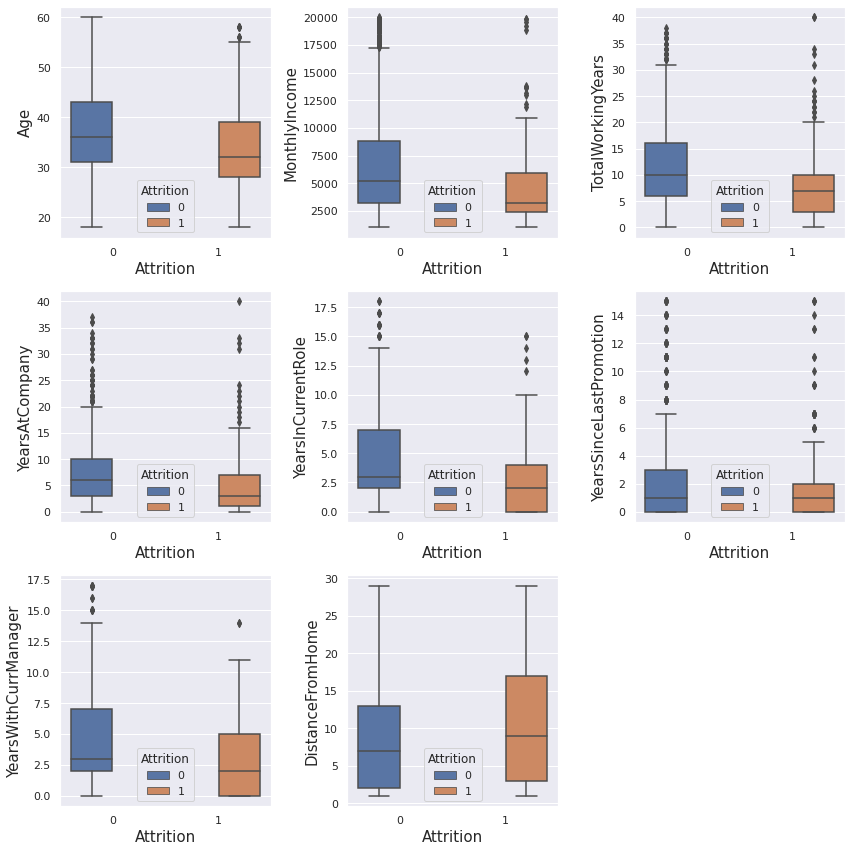

In [98]:
# Plotting al numerical variables with the target variable
sns.set
column_num= attrition[['Age', 'MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','DistanceFromHome']]

plt.figure(figsize=(12,12), facecolor='white')
plotnumber = 1

for column in column_num:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x="Attrition",y=column_num[column],hue="Attrition",data=attrition)
        plt.ylabel(column,fontsize=15)
        plt.xlabel('Attrition',fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Ques 6 - Age: Whether more young employees are leaving the organisation

#### Rationale: Young employees generally dont stay in one organisation for longer period and tend to switch jobs for better monetary terms




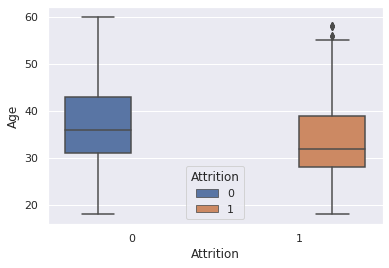

In [99]:
 sns.boxplot(x="Attrition",y="Age",hue="Attrition",data=attrition)

Observation: 
- Employees below 30 years are leaving the company 
- Avg years of employee leaving the company is less than that of employees staying in the company
- This indicates that younger employees roughly b/w (28-38 years) from the organisation is leaving the company and this could be for better prospects by switching jobs

### Ques 7 - Monthly income: Whether employees are leaving company due to low income

#### Rationale: Eventually employees is motivated if compensation is good otherwise employees will look for opportunity outside the company for their monetary growth




<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

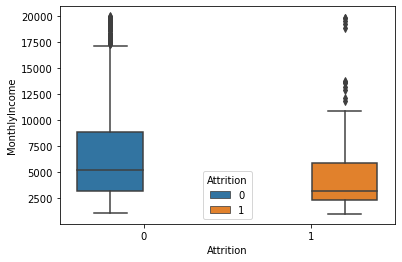

In [ ]:
 sns.boxplot(x="Attrition",y="MonthlyIncome",hue="Attrition",data=attrition)

Observation: 
- It is observed that data for attrition i.e employees of left the company is rightly skewed towards lower income
- Avg income of employees of left the company is lower than the employees who stayed in the company
- This indicates that monthly income could have contributed towards attrition rate 

### Ques 8 - Distance from Home: Whether employees are leaving company due long distance from office

#### Rationale: Employees may have issue due to long distance as there would be increase in travel time




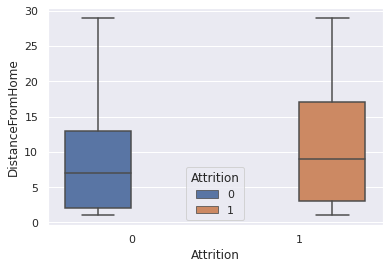

In [100]:
 sns.boxplot(x="Attrition",y="DistanceFromHome",hue="Attrition",data=attrition)

Observation: 
- It is observed that employees who left the company traveled from far away places than who is staying in the company
- Avg distance of employees is slightly higher than the employees who stayed in the company

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [102]:
attrition = pd.read_csv("https://raw.githubusercontent.com/HimKant/Datasets/main/attrition.csv")

## Feature Transformation

In [105]:
att1=attrition.copy()

### I. Transformation of Categorical variable into binary variable

In [106]:
##This is performed for the ease of model fitting and accuracy

att1.Gender=att1.Gender.map({'Male':1,'Female':0})
att1.OverTime=att1.OverTime.map({'Yes':1 , 'No':0})


### II. One hot encoding



In [107]:
# Creating dummy value for variable region same as one hot encoding

dummy=pd.get_dummies(att1["Department"])
dummy1=pd.get_dummies(att1["EducationField"])
dummy2=pd.get_dummies(att1["MaritalStatus"])

In [108]:
att1 = pd.concat([att1, dummy], axis=1)
att1 = pd.concat([att1, dummy1], axis=1)
att1 = pd.concat([att1, dummy2], axis=1)

In [109]:
dummy3=pd.get_dummies(att1["BusinessTravel"])
att1 = pd.concat([att1, dummy3], axis=1)

In [110]:
# att1.BusinessTravel =att1.BusinessTravel.map({'Travel_Frequently': 2, 'Travel_Rarely':1, 'Non-Travel':0})

In [111]:
att1.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,Marketing,Medical,Other,Technical Degree,Divorced,Married,Single,Non-Travel,Travel_Frequently,Travel_Rarely
0,41,1,Travel_Rarely,Sales,Life Sciences,2,0,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,1,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,Travel_Rarely,Research & Development,Other,4,1,2,1,3,...,0,0,1,0,0,0,1,0,0,1
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,0,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,Travel_Rarely,Research & Development,Medical,1,1,3,1,2,...,0,1,0,0,0,1,0,0,0,1


### III. Aggregation of variables

In [112]:
#Total spendings on various items
att1["CompanyCulture"] = att1["EnvironmentSatisfaction"]+ att1["JobSatisfaction"]+ att1["WorkLifeBalance"]

### IV. Binning variables

In [113]:
# Binning of BMI variable with numerical labels

att1['AgeGroup']=pd.cut(x=att1["Age"], bins=[18,30,42,60],
                        labels=["Young","Middle-Aged","High-aged",])
print(att1.head())

   Age  Attrition     BusinessTravel              Department EducationField  \
0   41          1      Travel_Rarely                   Sales  Life Sciences   
1   49          0  Travel_Frequently  Research & Development  Life Sciences   
2   37          1      Travel_Rarely  Research & Development          Other   
3   33          0  Travel_Frequently  Research & Development  Life Sciences   
4   27          0      Travel_Rarely  Research & Development        Medical   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  JobSatisfaction  \
0                        2       0               3         2                4   
1                        3       1               2         2                2   
2                        4       1               2         1                3   
3                        4       0               3         1                3   
4                        1       1               3         1                2   

   ... Other  Technical Degree  Divorc

In [114]:
att1['IncomeGroup']=pd.cut(x=att1['MonthlyIncome'], bins=[1000,6500,12000,17000],
                           labels=["Low","Medium","High",])
print(att1.head())

   Age  Attrition     BusinessTravel              Department EducationField  \
0   41          1      Travel_Rarely                   Sales  Life Sciences   
1   49          0  Travel_Frequently  Research & Development  Life Sciences   
2   37          1      Travel_Rarely  Research & Development          Other   
3   33          0  Travel_Frequently  Research & Development  Life Sciences   
4   27          0      Travel_Rarely  Research & Development        Medical   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  JobSatisfaction  \
0                        2       0               3         2                4   
1                        3       1               2         2                2   
2                        4       1               2         1                3   
3                        4       0               3         1                3   
4                        1       1               3         1                2   

   ... Technical Degree  Divorced  Mar

In [115]:
att1['Junior']=np.where(att1.JobLevel==1,1,0) 

In [116]:
# Creating dummy value for variable region same as one hot encoding

dummy4=pd.get_dummies(att1["IncomeGroup"])
dummy5=pd.get_dummies(att1["AgeGroup"])

In [117]:
att1 = pd.concat([att1, dummy4], axis=1)
att1 = pd.concat([att1, dummy5], axis=1)


## Model fitting through Decision Tree

#### Import libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting regression tree
from sklearn.tree import DecisionTreeClassifier

#For plotting a decision tree
from sklearn import tree

#for cross validation
from sklearn.model_selection import cross_val_score

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

In [119]:
att1.tail()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,CompanyCulture,AgeGroup,IncomeGroup,Junior,Low,Medium,High,Young,Middle-Aged,High-aged
1465,36,0,Travel_Frequently,Research & Development,Medical,3,1,4,2,4,...,10,Middle-Aged,Low,0,1,0,0,0,1,0
1466,39,0,Travel_Rarely,Research & Development,Medical,4,1,2,3,1,...,8,Middle-Aged,Medium,0,0,1,0,0,1,0
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,1,4,2,2,...,7,Young,Low,0,1,0,0,1,0,0
1468,49,0,Travel_Frequently,Sales,Medical,4,1,2,2,2,...,8,High-aged,Low,0,1,0,0,0,0,1
1469,34,0,Travel_Rarely,Research & Development,Medical,2,1,4,2,3,...,9,Middle-Aged,Low,0,1,0,0,0,1,0


### DT Model 1  

#### 1. Setting Predictors and Target variable

In [121]:
X= att1 [["Junior","TotalWorkingYears","YearsInCurrentRole","MonthlyIncome","CompanyCulture","Single", "Sales","Human Resources","Travel_Frequently","OverTime","DistanceFromHome"]]
y= att1.Attrition

In [122]:
X= att1 [["Junior","TotalWorkingYears","YearsInCurrentRole","Low","CompanyCulture","Single", "Sales","Travel_Frequently","OverTime","DistanceFromHome","Young"]]
y= att1.Attrition

In [123]:
X.head()

,Junior,TotalWorkingYears,YearsInCurrentRole,Low,CompanyCulture,Single,Sales,Travel_Frequently,OverTime,DistanceFromHome,Young
0,0,8,4,1,7,1,1,0,1,1,0
1,0,10,7,1,8,0,0,1,0,8,0
2,1,7,0,1,10,1,0,0,1,2,0
3,1,8,7,1,10,0,0,1,1,3,0
4,1,6,2,1,6,0,0,0,0,2,1


#### 2. Splitting dataset into train - valid - test

In [124]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [125]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

#### 3. Fitting a Decision Tree Classifier - Train data

In [127]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=5, min_samples_leaf=5, random_state = 100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

#### 4. Prediction - Train-Valid data

In [128]:
#Making Prediction
y_pred = clf_gini.predict(X_valid)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

#### 5. Evaluation of Model Performance - Train data

In [129]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [130]:

### Confusion Matrix

c = confusion_matrix(y_valid, y_pred)
c

array([[227,  10],
       [ 42,  15]])

In [131]:
print(accuracy_score(y_valid, clf_gini.predict(X_valid)))

0.8231292517006803


In [132]:
## calculating precision and reall
precision = precision_score(y_valid, y_pred)*100# (TP/TP+FP)
recall = recall_score(y_valid, y_pred)*100 ## True positive rate (TP/TP+FN)

print(precision, recall)

60.0 26.31578947368421


In [ ]:
# Checking optimal depth

In [ ]:
### With Decision_Tree 
Depth = np.arange(1,10)
Acc_dt =[]
Spec_dt = []

for d in Depth:
    # define parameters
    clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=d, min_samples_leaf=5, random_state=100)
    # fit model on training data
    clf_gini.fit(X_train, y_train)
    # prediction of y on validation data
    y_pred = clf_gini.predict(X_valid)
    #creating confusion matrix
    cf_mat = confusion_matrix (y_valid,y_pred) 
    # calculculating accuracy
    Acc_dt.append((cf_mat[0,0]+cf_mat[1,1])/np.sum(cf_mat)*100)
    # calculating specificity
    num = (cf_mat[0,0]+cf_mat[1,1])   #Total number of correct negative predictions
    den = (np.sum(cf_mat[0,:])+np.sum(cf_mat[1,:])) #Total number of negative observations
    Spec_dt.append(num/den)

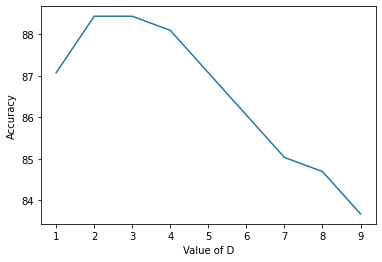

In [ ]:
plt.plot(Depth,np.array(Acc_dt))
plt.xlabel("Value of D")
plt.ylabel("Accuracy")

plt.show()

#### 6. Fitting Regressor tree - Test data

In [133]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=5, min_samples_leaf=5, random_state = 100)
clf_gini.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

#### 7. Prediction - Test data

In [134]:
y_predt=clf_gini.predict(X_test)

#### 8. Evaluation of model performance

In [135]:
### Confusion Matrix

c = confusion_matrix(y_test, y_predt)
c

array([[247,   4],
       [ 31,  12]])

In [136]:
print(accuracy_score(y_test, clf_gini.predict(X_test)))

0.8809523809523809


In [137]:
## calculating precision and reall
precision = precision_score(y_test, y_predt)*100# (TP/TP+FP)
recall = recall_score(y_test, y_predt)*100 ## True positive rate (TP/TP+FN)

print(precision, recall)

75.0 27.906976744186046


### DT Model 2

In [138]:
X= att1 [["JobInvolvement","Junior","Low","Young","CompanyCulture","Single", "Sales","Human Resources","Travel_Frequently","OverTime","DistanceFromHome"]]
y= att1.Attrition

#### 2. Splitting dataset into train - valid - test

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [140]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

#### 3. Fitting a Decision Tree Classifier - Train data

In [154]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=5, min_samples_leaf=5, random_state = 100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

#### 4. Prediction - Train-Valid data

In [155]:
#Making Prediction
y_pred = clf_gini.predict(X_valid)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0])

#### 5. Evaluation of Model Performance - Train data

In [156]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [157]:

### Confusion Matrix

c = confusion_matrix(y_valid, y_pred)
c

array([[242,  10],
       [ 26,  16]])

In [158]:
print(accuracy_score(y_valid, clf_gini.predict(X_valid)))

0.8775510204081632


In [159]:
## calculating precision and reall
precision = precision_score(y_valid, y_pred)*100# (TP/TP+FP)
recall = recall_score(y_valid, y_pred)*100 ## True positive rate (TP/TP+FN)

print(precision, recall)

61.53846153846154 38.095238095238095


In [160]:
# Checking optimal depth

In [161]:
### With Decision_Tree 
Depth = np.arange(1,10)
Acc_dt =[]
Spec_dt = []

for d in Depth:
    # define parameters
    clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=d, min_samples_leaf=5, random_state=100)
    # fit model on training data
    clf_gini.fit(X_train, y_train)
    # prediction of y on validation data
    y_pred = clf_gini.predict(X_valid)
    #creating confusion matrix
    cf_mat = confusion_matrix (y_valid,y_pred) 
    # calculculating accuracy
    Acc_dt.append((cf_mat[0,0]+cf_mat[1,1])/np.sum(cf_mat)*100)
    # calculating specificity
    num = (cf_mat[0,0]+cf_mat[1,1])   #Total number of correct negative predictions
    den = (np.sum(cf_mat[0,:])+np.sum(cf_mat[1,:])) #Total number of negative observations
    Spec_dt.append(num/den)

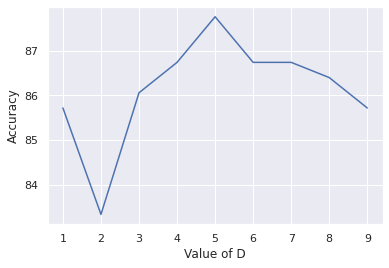

In [162]:
plt.plot(Depth,np.array(Acc_dt))
plt.xlabel("Value of D")
plt.ylabel("Accuracy")

plt.show()

#### 6. Fitting Regressor tree - Test data

In [163]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=5, min_samples_leaf=5, random_state = 100)
clf_gini.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

#### 7. Prediction - Test data

In [165]:
y_predt=clf_gini.predict(X_test)

#### 8. Evaluation of model performance

In [166]:
### Confusion Matrix

c = confusion_matrix(y_test, y_predt)
c

array([[234,  12],
       [ 23,  25]])

In [168]:
print(accuracy_score(y_test, clf_gini.predict(X_test)))

0.8809523809523809


In [170]:
## calculating precision and reall
precision = precision_score(y_test, y_predt)*100# (TP/TP+FP)
recall = recall_score(y_test, y_predt)*100 ## True positive rate (TP/TP+FN)

print(precision, recall)

67.56756756756756 52.083333333333336


We will go by DT model 2 where Accuracy score for train is 87.75% vs 88% in test data;
Precision for train data is 61.53% vs 67.56% 
Recall for train data is 38% vs 52%


## Model fitting through K- Nearest Neighbor (KNN)

#### 1. Setting Predictors and Target variable

In [171]:
from sklearn.neighbors import KNeighborsClassifier
#Function test-train split
from sklearn.model_selection import train_test_split


In [180]:
X1= att1 [["JobInvolvement","Junior","Low","Young","CompanyCulture","Single", "Sales","Human Resources","Travel_Frequently","OverTime","DistanceFromHome"]]
y1= att1.Attrition

In [181]:
(X1_train, X1_test, y1_train, y1_test) = train_test_split(X1, y1, test_size = 0.3)

In [182]:
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1_train, y1_train, test_size = 0.25)

In [183]:
len(X1_train)

771

In [184]:
len(X1_test)

441

In [185]:
K = np.arange(1,51)
Acc_KNN =[]
Spec_KNN = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') 
    knn.fit(X_train, y_train)                                     
    y_pred = knn.predict(X_valid)
    c_mat = confusion_matrix (y_valid,y_pred) 
    Acc_KNN.append((c_mat[0,0]+c_mat[1,1])/np.sum(c_mat)*100)
    num = (c_mat[0,0]+c_mat[1,1])   #Total number of correct negative predictions
    den = (np.sum(c_mat[0,:])+np.sum(c_mat[1,:])) #Total number of negative observations
    Spec_KNN.append(num/den)

### 4. Standardization

In [186]:
X1_scaled_train = X1_train.apply(lambda X: (X - np.mean(X)) / np.std(X))

In [187]:
X1_scaled_test = X1_test.apply(lambda x: (x - np.mean(x)) / np.std(x))

### 5.  KNN Classifier

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #5NN

# fitting the model
knn.fit(X1_train, y1_train)

KNeighborsClassifier(metric='euclidean')

### 6. Prediction

In [190]:
predicted_values = knn.predict(X1_valid)

In [191]:
predicted_values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [192]:
len(X_test)

294

In [193]:
# function to create a confusion matrix
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y1_valid,predicted_values)
c

array([[217,   3],
       [ 34,   4]])

In [194]:
print(accuracy_score(y1_valid, knn.predict(X1_valid)))

0.8565891472868217


In [197]:
## calculating precision and reall
precision = precision_score(y1_valid, predicted_values)*100# (TP/TP+FP)
recall = recall_score(y1_valid, predicted_values)*100 ## True positive rate (TP/TP+FN)

print(precision, recall)

57.14285714285714 10.526315789473683


In [198]:
# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #5NN

# fitting the model
knn.fit(X1_test, y1_test)

KNeighborsClassifier(metric='euclidean')

### 6. Prediction

In [201]:
predicted_values1 = knn.predict(X1_test)

In [202]:
predicted_values1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
len(X_test)

294

In [203]:
# function to create a confusion matrix
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y1_test,predicted_values1)
c

array([[362,   3],
       [ 58,  18]])

In [205]:
print(accuracy_score(y1_test, knn.predict(X1_test)))

0.8616780045351474


In [206]:
## calculating precision and reall
precision = precision_score(y1_test, predicted_values1)*100# (TP/TP+FP)
recall = recall_score(y1_test, predicted_values1)*100 ## True positive rate (TP/TP+FN)

print(precision, recall)

85.71428571428571 23.684210526315788
